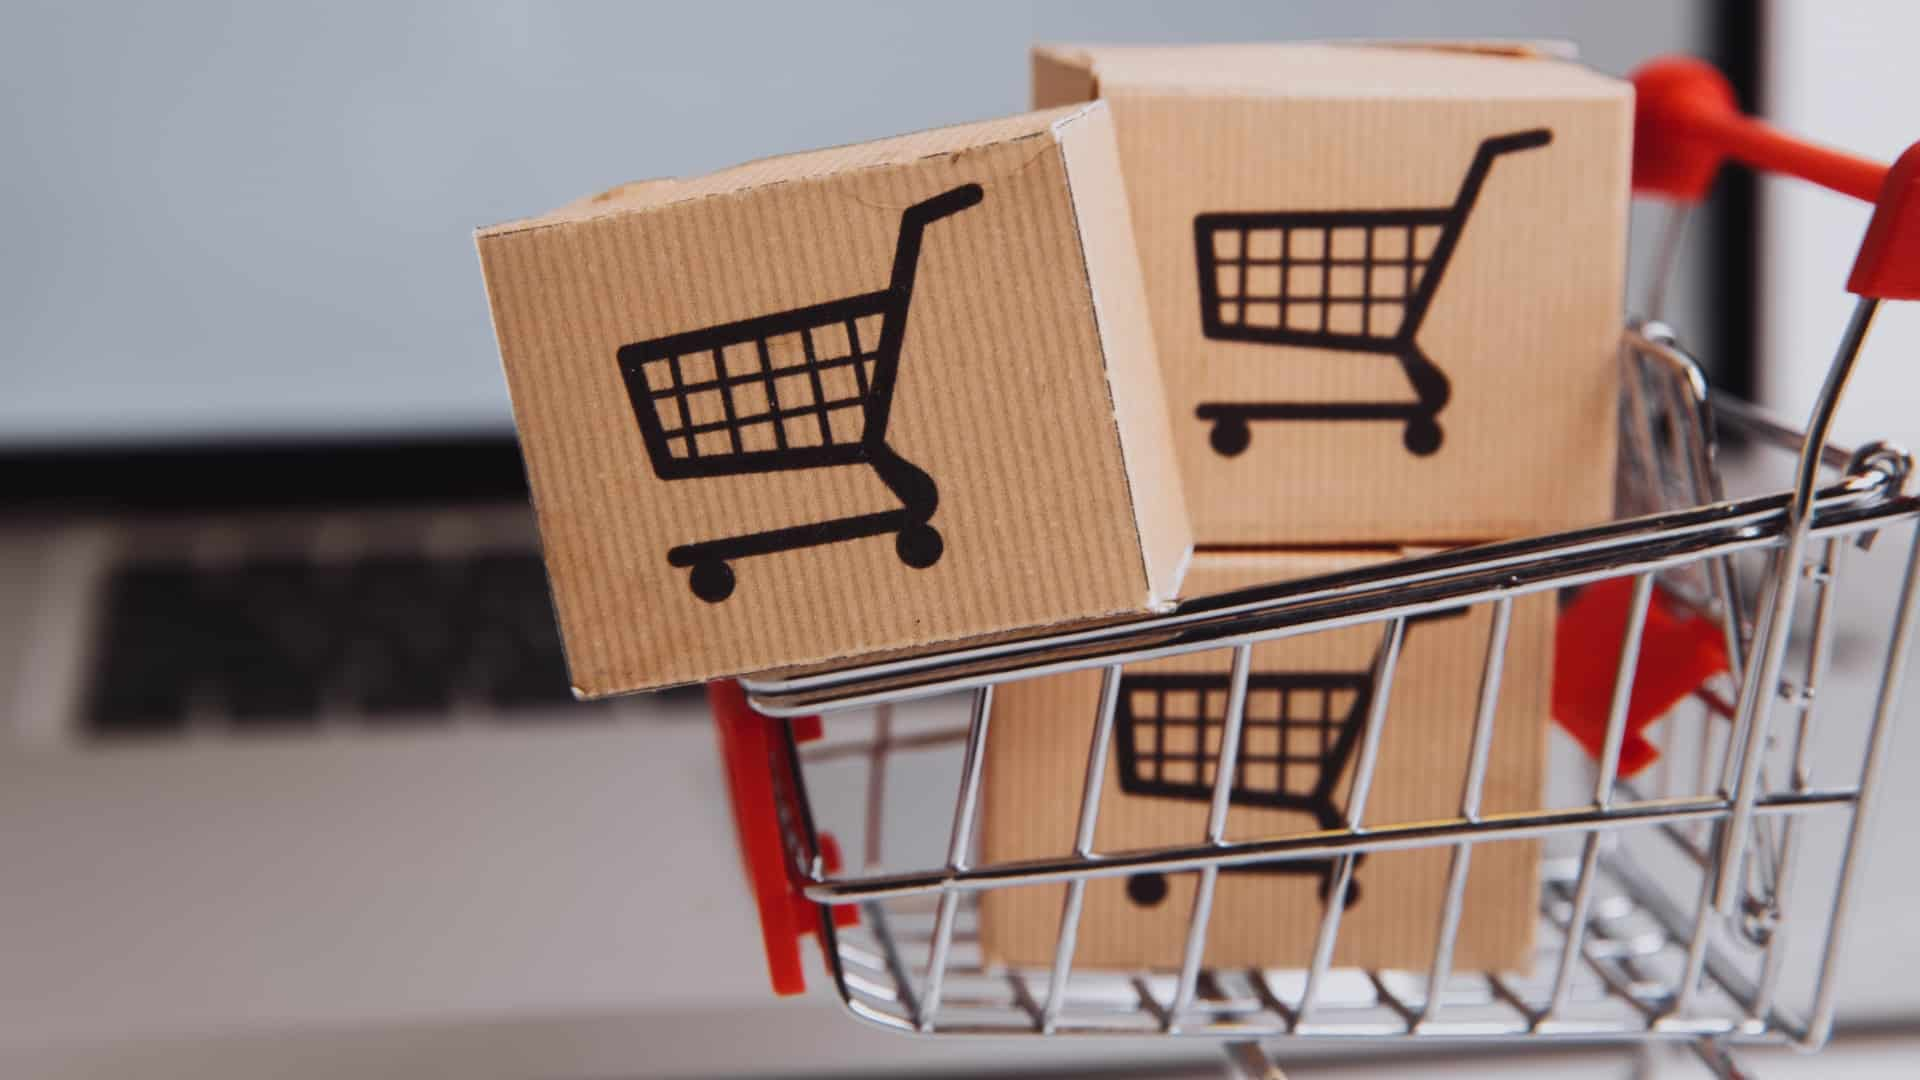

In [48]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
#Read csv file
list_of_orders = pd.read_csv('List of Orders.csv')
order_details = pd.read_csv('Order Details.csv')
sales_target = pd.read_csv('Sales Target.csv')

In [50]:
list_of_orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [51]:
order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [52]:
sales_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [53]:
list_of_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [54]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [55]:
sales_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [56]:
#Checking null value
list_of_orders.isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [57]:
# Remove NULL values
list_of_orders = list_of_orders.dropna()

In [58]:
list_of_orders.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

## Sales Order by Category

In [59]:
order_details['Category'].unique()

array(['Furniture', 'Clothing', 'Electronics'], dtype=object)

In [60]:
Furniture_count = order_details[order_details['Category'] == 'Furniture']['Category'].count()
Furniture_count

243

In [61]:
Clothing_count = order_details[order_details['Category'] == 'Clothing']['Category'].count()
Clothing_count

949

In [62]:
Electronics_count = order_details[order_details['Category'] == 'Electronics']['Category'].count()
Electronics_count

308

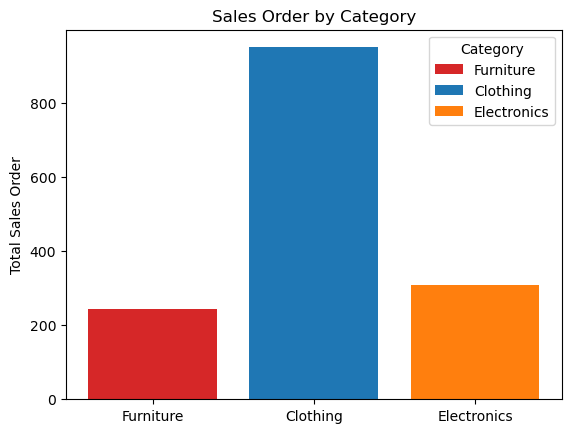

In [63]:
fig, ax = plt.subplots()

category = ['Furniture', 'Clothing', 'Electronics']
counts = [Furniture_count, Clothing_count, Electronics_count]
bar_labels = ['Furniture', 'Clothing', 'Electronics']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

# Plot each bar individually with label
for i in range(len(category)):
    ax.bar(category[i], counts[i], label=bar_labels[i], color=bar_colors[i])

ax.set_ylabel('Total Sales Order')
ax.set_title('Sales Order by Category')
ax.legend(title='Category')

plt.show()


## Sales Order by City and State

In [64]:
top_city = list_of_orders['City'].value_counts()[0:5]
top_city

Indore        76
Mumbai        68
Chandigarh    30
Delhi         25
Bhopal        22
Name: City, dtype: int64

Text(0.5, 1.0, 'Sales Order by City')

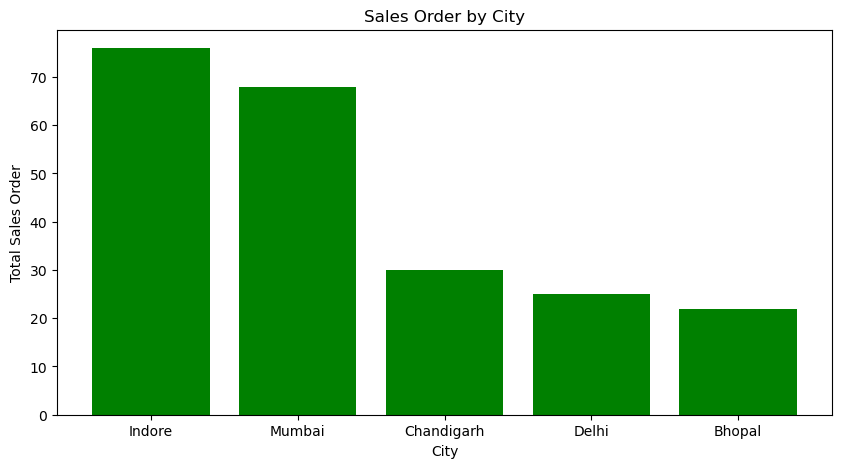

In [65]:
plt.figure(figsize=(10,5))
plt.bar(list(list_of_orders['City'].value_counts()[0:5].keys()),list(list_of_orders['City'].value_counts())[0:5], color='g')

plt.ylabel('Total Sales Order')
plt.xlabel('City')
plt.title('Sales Order by City')

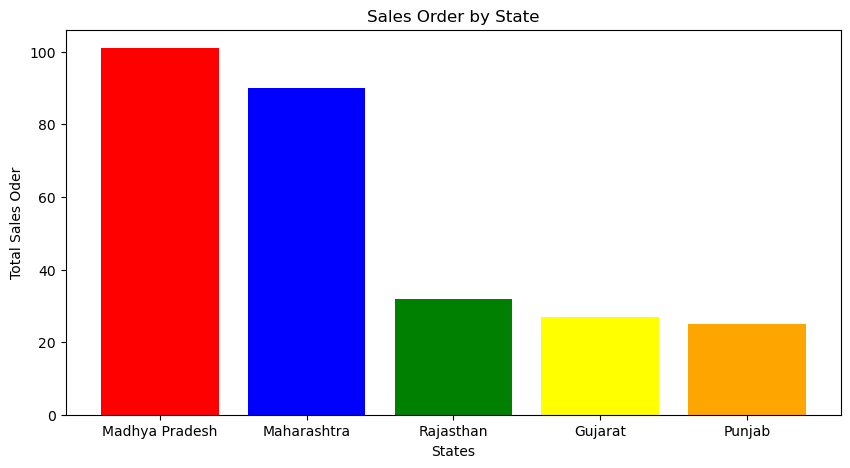

In [66]:
# Define the colors for each bar
colors = ['red', 'blue', 'green', 'yellow', 'orange']

# Get the top 5 state and their counts
top_states = list_of_orders['State'].value_counts().nlargest(5)
states= top_states.index
counts = top_states.values

# Create the bar plot with individual colors for each bar
plt.figure(figsize=(10, 5))
bars = plt.bar(states, counts, color=colors)

plt.ylabel('Total Sales Oder')
plt.xlabel('States')
plt.title('Sales Order by State')

plt.show()

## Average Qty sold by Category

In [67]:
order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [68]:
Furniture_avg = order_details[order_details["Category"] == "Furniture"]["Quantity"].mean()
Furniture_avg

3.888888888888889

In [69]:
Clothing_avg = order_details[order_details["Category"] == "Clothing"]["Quantity"].mean()
Clothing_avg

3.7049525816649105

In [70]:
Electronics_avg = order_details[order_details["Category"] == "Electronics"]["Quantity"].mean()
Electronics_avg

3.7467532467532467

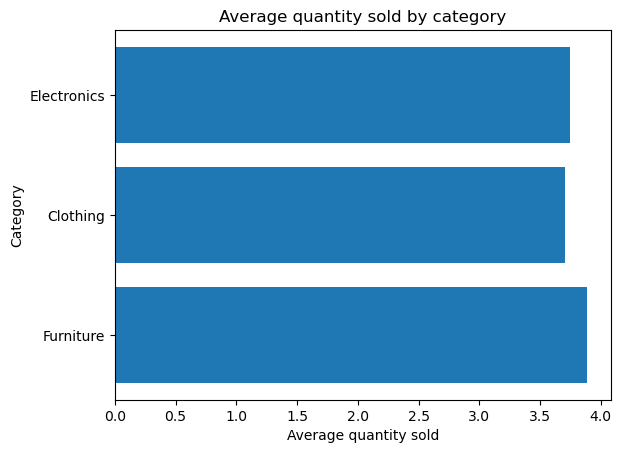

In [71]:
y_axis = ["Furniture", "Clothing", "Electronics"]
x_axis = [Furniture_avg, Clothing_avg, Electronics_avg]

plt.barh(y_axis, x_axis)
plt.title("Average quantity sold by category")
plt.ylabel("Category")
plt.xlabel("Average quantity sold")
plt.show()

## Exploratory Data Analysis by Category

In [72]:
Furniture_min = order_details[order_details["Category"] == "Furniture"]["Quantity"].min()
Furniture_min

1

In [73]:
Furniture_max = order_details[order_details["Category"] == "Furniture"]["Quantity"].max()
Furniture_max

14

In [74]:
Clothing_min = order_details[order_details["Category"] == "Clothing"]["Quantity"].min()
Clothing_min

1

In [75]:
Clothing_max = order_details[order_details["Category"] == "Clothing"]["Quantity"].max()
Clothing_max

14

In [76]:
Electronics_min = order_details[order_details["Category"] == "Electronics"]["Quantity"].min()
Electronics_min

1

In [77]:
Electronics_max = order_details[order_details["Category"] == "Electronics"]["Quantity"].max()
Electronics_max

13

In [78]:
# initialize list of lists
data = [['Electronics', Electronics_min, Electronics_avg, Electronics_max], ['Clothing', Clothing_min, Clothing_avg, Clothing_max], ['Furniture', Furniture_min, Furniture_avg, Furniture_max]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Category', 'Lowest Sold', 'Average Sold', 'Highest Sold'])
 
# print dataframe.
print(df)

      Category  Lowest Sold  Average Sold  Highest Sold
0  Electronics            1      3.746753            13
1     Clothing            1      3.704953            14
2    Furniture            1      3.888889            14
